Точность модели: 0.7297297297297297
Precision: 0.7407407407407407
Recall: 0.8695652173913043
F1: 0.7999999999999999


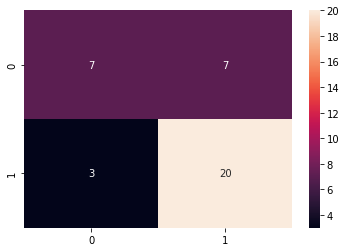

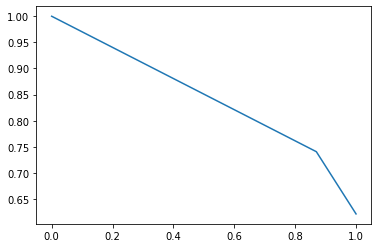

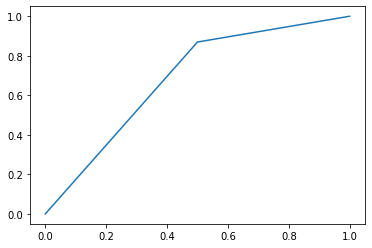

Точность модели SVC: 0.6216216216216216
Точность модели KNeighborsClassifier: 0.6756756756756757


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# Загрузка данных
df = pd.read_csv('titanic.csv')

# Предобработка данных
df.dropna(inplace=True)
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3})

# Разделение данных на обучающую и тестовую выборки
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели логистической регрессии
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy}')

# Вычисление и вывод метрик Precision, Recall и F1
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision}\nRecall: {recall}\nF1: {f1}')

# Отрисовка тепловой карты матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Отрисовка кривых PR и ROC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision)
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.show()

# Обучение моделей SVM и KNN
svm_model = SVC()
svm_model.fit(X_train, y_train)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Предсказание и оценка точности для каждой модели
for model in [svm_model, knn_model]:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Точность модели {model.__class__.__name__}: {accuracy}')



Точность модели SVC: 0.6216216216216216
Precision: 0.6216216216216216
Recall: 1.0
F1: 0.7666666666666667


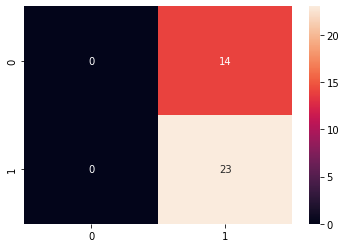

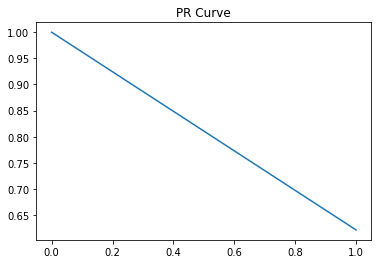

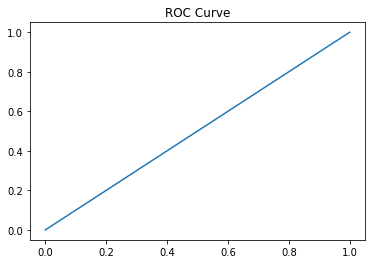

              precision    recall  f1-score   support

           1       0.62      1.00      0.77        23

   micro avg       0.62      1.00      0.77        23
   macro avg       0.62      1.00      0.77        23
weighted avg       0.62      1.00      0.77        23


Точность модели KNeighborsClassifier: 0.6756756756756757
Precision: 0.6774193548387096
Recall: 0.9130434782608695
F1: 0.7777777777777777


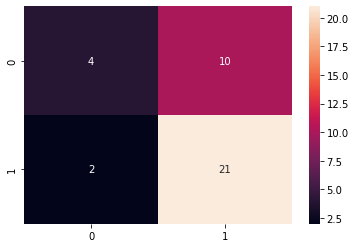

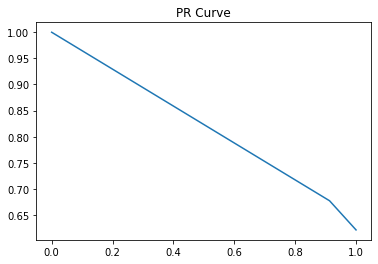

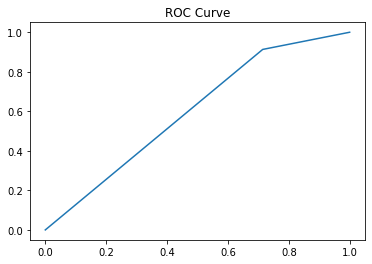

              precision    recall  f1-score   support

           0       0.67      0.29      0.40        14
           1       0.68      0.91      0.78        23

    accuracy                           0.68        37
   macro avg       0.67      0.60      0.59        37
weighted avg       0.67      0.68      0.63        37



In [2]:
from sklearn.metrics import classification_report
import numpy as np
# Список моделей
models = [svm_model, knn_model]

for model in models:
    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Оценка точности модели
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\nТочность модели {model.__class__.__name__}: {accuracy}')

    # Вычисление и вывод метрик Precision, Recall и F1
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)

    print(f'Precision: {precision}\nRecall: {recall}\nF1: {f1}')

    # Отрисовка тепловой карты матрицы ошибок
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

    # Отрисовка кривых PR и ROC
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision)
    plt.title('PR Curve')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.title('ROC Curve')
    plt.show()

    # Вывод отчета классификации
    print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
    
    '''
    В общем случае, модель с наивысшими значениями точности, полноты, F1-меры и площади под ROC-кривой (AUC-ROC) будет считаться лучшей. 
    '''
